# **ROBOFLOW'DAN DATASETİ İÇERİ AKTARMA**

In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="**************") # ROBOFLOWDAN ALINAN API KEY BURAYA YAZILACAK
project = rf.workspace("ademworkspace").project("face-regec-miniproject")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


# **YOLOV8 KULLANMAK İÇİN ULTRALYTICS YÜKLÜYORUZ**

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

# **MODELİ TRAIN EDİYORUZ**

In [3]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

model.train(data='/content/face-regec-miniproject-5/data.yaml', epochs=30, imgsz=640, batch=8)

100%|██████████| 6.25M/6.25M [00:00<00:00, 341MB/s]


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/face-regec-miniproject-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

100%|██████████| 755k/755k [00:00<00:00, 93.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 43.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 959.5±330.0 MB/s, size: 45.5 KB)


train: Scanning /content/face-regec-miniproject-5/train/labels... 282 images, 0 backgrounds, 0 corrupt: 100%|██████████| 282/282 [00:00<00:00, 2321.36it/s]

train: New cache created: /content/face-regec-miniproject-5/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 463.5±280.7 MB/s, size: 34.0 KB)


val: Scanning /content/face-regec-miniproject-5/valid/labels... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 1123.77it/s]

val: New cache created: /content/face-regec-miniproject-5/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.12G      1.385      2.655      1.529          4        640: 100%|██████████| 36/36 [00:07<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         23         23    0.00604      0.998       0.49      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.37G      1.447      2.089      1.568          3        640: 100%|██████████| 36/36 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.77it/s]

                   all         23         23      0.718      0.609       0.69      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.38G       1.47       1.96      1.582          2        640: 100%|██████████| 36/36 [00:05<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.32it/s]

                   all         23         23       0.51      0.565       0.57      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       1.4G        1.4      1.765      1.502          5        640: 100%|██████████| 36/36 [00:06<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         23         23      0.725      0.783      0.834      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.42G      1.331      1.588      1.508          8        640: 100%|██████████| 36/36 [00:06<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         23         23      0.838      0.696      0.785      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.44G      1.289      1.458      1.437          5        640: 100%|██████████| 36/36 [00:06<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.77it/s]


                   all         23         23      0.806      0.957      0.966      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.45G       1.38      1.384      1.473          2        640: 100%|██████████| 36/36 [00:05<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         23         23      0.883      0.957      0.946       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.47G      1.288       1.33      1.419          6        640: 100%|██████████| 36/36 [00:07<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         23         23      0.958      0.995      0.993       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.49G      1.255      1.231      1.366          4        640: 100%|██████████| 36/36 [00:05<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         23         23      0.989      0.957      0.993      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       1.5G      1.281      1.222      1.417          3        640: 100%|██████████| 36/36 [00:06<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all         23         23      0.945          1      0.992      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.52G      1.304      1.153       1.42          5        640: 100%|██████████| 36/36 [00:05<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all         23         23          1      0.997      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.54G      1.309      1.094      1.428          6        640: 100%|██████████| 36/36 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.17it/s]


                   all         23         23      0.993          1      0.995      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.56G      1.201      1.046      1.363          6        640: 100%|██████████| 36/36 [00:05<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.14it/s]


                   all         23         23          1      0.995      0.995      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.57G      1.177     0.9793      1.354          2        640: 100%|██████████| 36/36 [00:06<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]

                   all         23         23      0.992          1      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.59G      1.237     0.9852      1.374          3        640: 100%|██████████| 36/36 [00:05<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         23         23      0.984          1      0.995      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.61G      1.216     0.9506      1.356          3        640: 100%|██████████| 36/36 [00:06<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]

                   all         23         23      0.998          1      0.995      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.62G      1.148     0.8833      1.324          2        640: 100%|██████████| 36/36 [00:05<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all         23         23      0.999          1      0.995      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.64G      1.107     0.8945      1.288          5        640: 100%|██████████| 36/36 [00:06<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]


                   all         23         23          1      0.998      0.995      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.66G      1.137     0.8384      1.277          2        640: 100%|██████████| 36/36 [00:05<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all         23         23      0.995          1      0.995      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.68G      1.075      0.795      1.281          2        640: 100%|██████████| 36/36 [00:06<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         23         23      0.992          1      0.995      0.674


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.69G      1.025     0.7889      1.291          2        640: 100%|██████████| 36/36 [00:05<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         23         23      0.996          1      0.995        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.71G       1.02     0.7339       1.28          2        640: 100%|██████████| 36/36 [00:06<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.86it/s]

                   all         23         23      0.996          1      0.995      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.73G     0.9604     0.6942      1.254          2        640: 100%|██████████| 36/36 [00:05<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.91it/s]

                   all         23         23      0.996          1      0.995      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.74G     0.9606     0.6781      1.228          2        640: 100%|██████████| 36/36 [00:05<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         23         23      0.995          1      0.995      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.76G     0.9403     0.6428      1.253          2        640: 100%|██████████| 36/36 [00:05<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         23         23      0.996          1      0.995      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.78G     0.8865       0.62      1.185          2        640: 100%|██████████| 36/36 [00:05<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         23         23      0.997          1      0.995      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.79G     0.8591     0.5791      1.159          2        640: 100%|██████████| 36/36 [00:05<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.80it/s]

                   all         23         23      0.997          1      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.81G     0.8465     0.5744      1.155          2        640: 100%|██████████| 36/36 [00:04<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all         23         23      0.997          1      0.995      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.83G     0.8237     0.5651      1.151          2        640: 100%|██████████| 36/36 [00:06<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         23         23      0.997          1      0.995      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.85G      0.821     0.5727      1.145          2        640: 100%|██████████| 36/36 [00:04<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         23         23      0.997          1      0.995       0.71



30 epochs completed in 0.053 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


                   all         23         23          1      0.998      0.995      0.723
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ece181c94d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# **TRAIN EDİLEN MODELİN EN İYİ HALİNİ TEST EDİP SONUÇLARI KAYDEDEREK EKRANDA GÖSTERİYORUZ**

In [ ]:
import os
from IPython.display import display
from PIL import Image


model = YOLO('/content/runs/detect/train/weights/best.pt')


test_images_dir = '/content/face-regec-miniproject-5/test/images'

# Çıktıları nereye kaydedeceğini belirliyoruz
output_dir = '/content/test_predictions'
os.makedirs(output_dir, exist_ok=True)

# Görselleri işliyoruz
for file_name in os.listdir(test_images_dir):
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        image_path = os.path.join(test_images_dir, file_name)


        results = model.predict(source=image_path, conf=0.5, save=True)


        pred_path = os.path.join('/content/runs/detect/predict', file_name)


        if os.path.exists(pred_path):
            display(Image.open(pred_path))


# **MODEL SONUÇLARI**

In [17]:
import pandas as pd

results_df = pd.read_csv('/content/runs/detect/train/results.csv')
results_df.tail(10)  # son 10 epocH


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
20,21,136.856,1.02517,0.78890,1.29097,0.99603,1.0,0.995,0.70008,0.99764,0.59026,1.40892,0.000680,0.000680,0.000680
21,22,143.493,1.02040,0.73390,1.27982,0.99622,1.0,0.995,0.68871,0.90293,0.53207,1.28378,0.000614,0.000614,0.000614
22,23,148.991,0.96040,0.69420,1.25432,0.99575,1.0,0.995,0.65544,1.00874,0.53427,1.33483,0.000548,0.000548,0.000548
23,24,155.497,0.96063,0.67806,1.22832,0.99497,1.0,0.995,0.68767,0.92199,0.52985,1.27388,0.000482,0.000482,0.000482
24,25,161.160,0.94033,0.64284,1.25266,0.99569,1.0,0.995,0.67538,1.12259,0.53411,1.47060,0.000416,0.000416,0.000416
25,26,166.997,0.88645,0.62004,1.18522,0.99661,1.0,0.995,0.71230,0.99713,0.49910,1.35962,0.000350,0.000350,0.000350
26,27,173.149,0.85915,0.57910,1.15935,0.99690,1.0,0.995,0.70521,0.90483,0.46794,1.33025,0.000284,0.000284,0.000284
27,28,178.588,0.84650,0.57439,1.15502,0.99718,1.0,0.995,0.67735,0.99337,0.46341,1.39088,0.000218,0.000218,0.000218
28,29,185.186,0.82366,0.56510,1.15092,0.99732,1.0,0.995,0.68874,0.94976,0.44162,1.36138,0.000152,0.000152,0.000152
29,30,190.640,0.82102,0.57269,1.14451,0.99731,1.0,0.995,0.70988,0.90930,0.42531,1.32428,0.000086,0.000086,0.000086


# **MODEL SONUÇ GRAFİKLERİ**

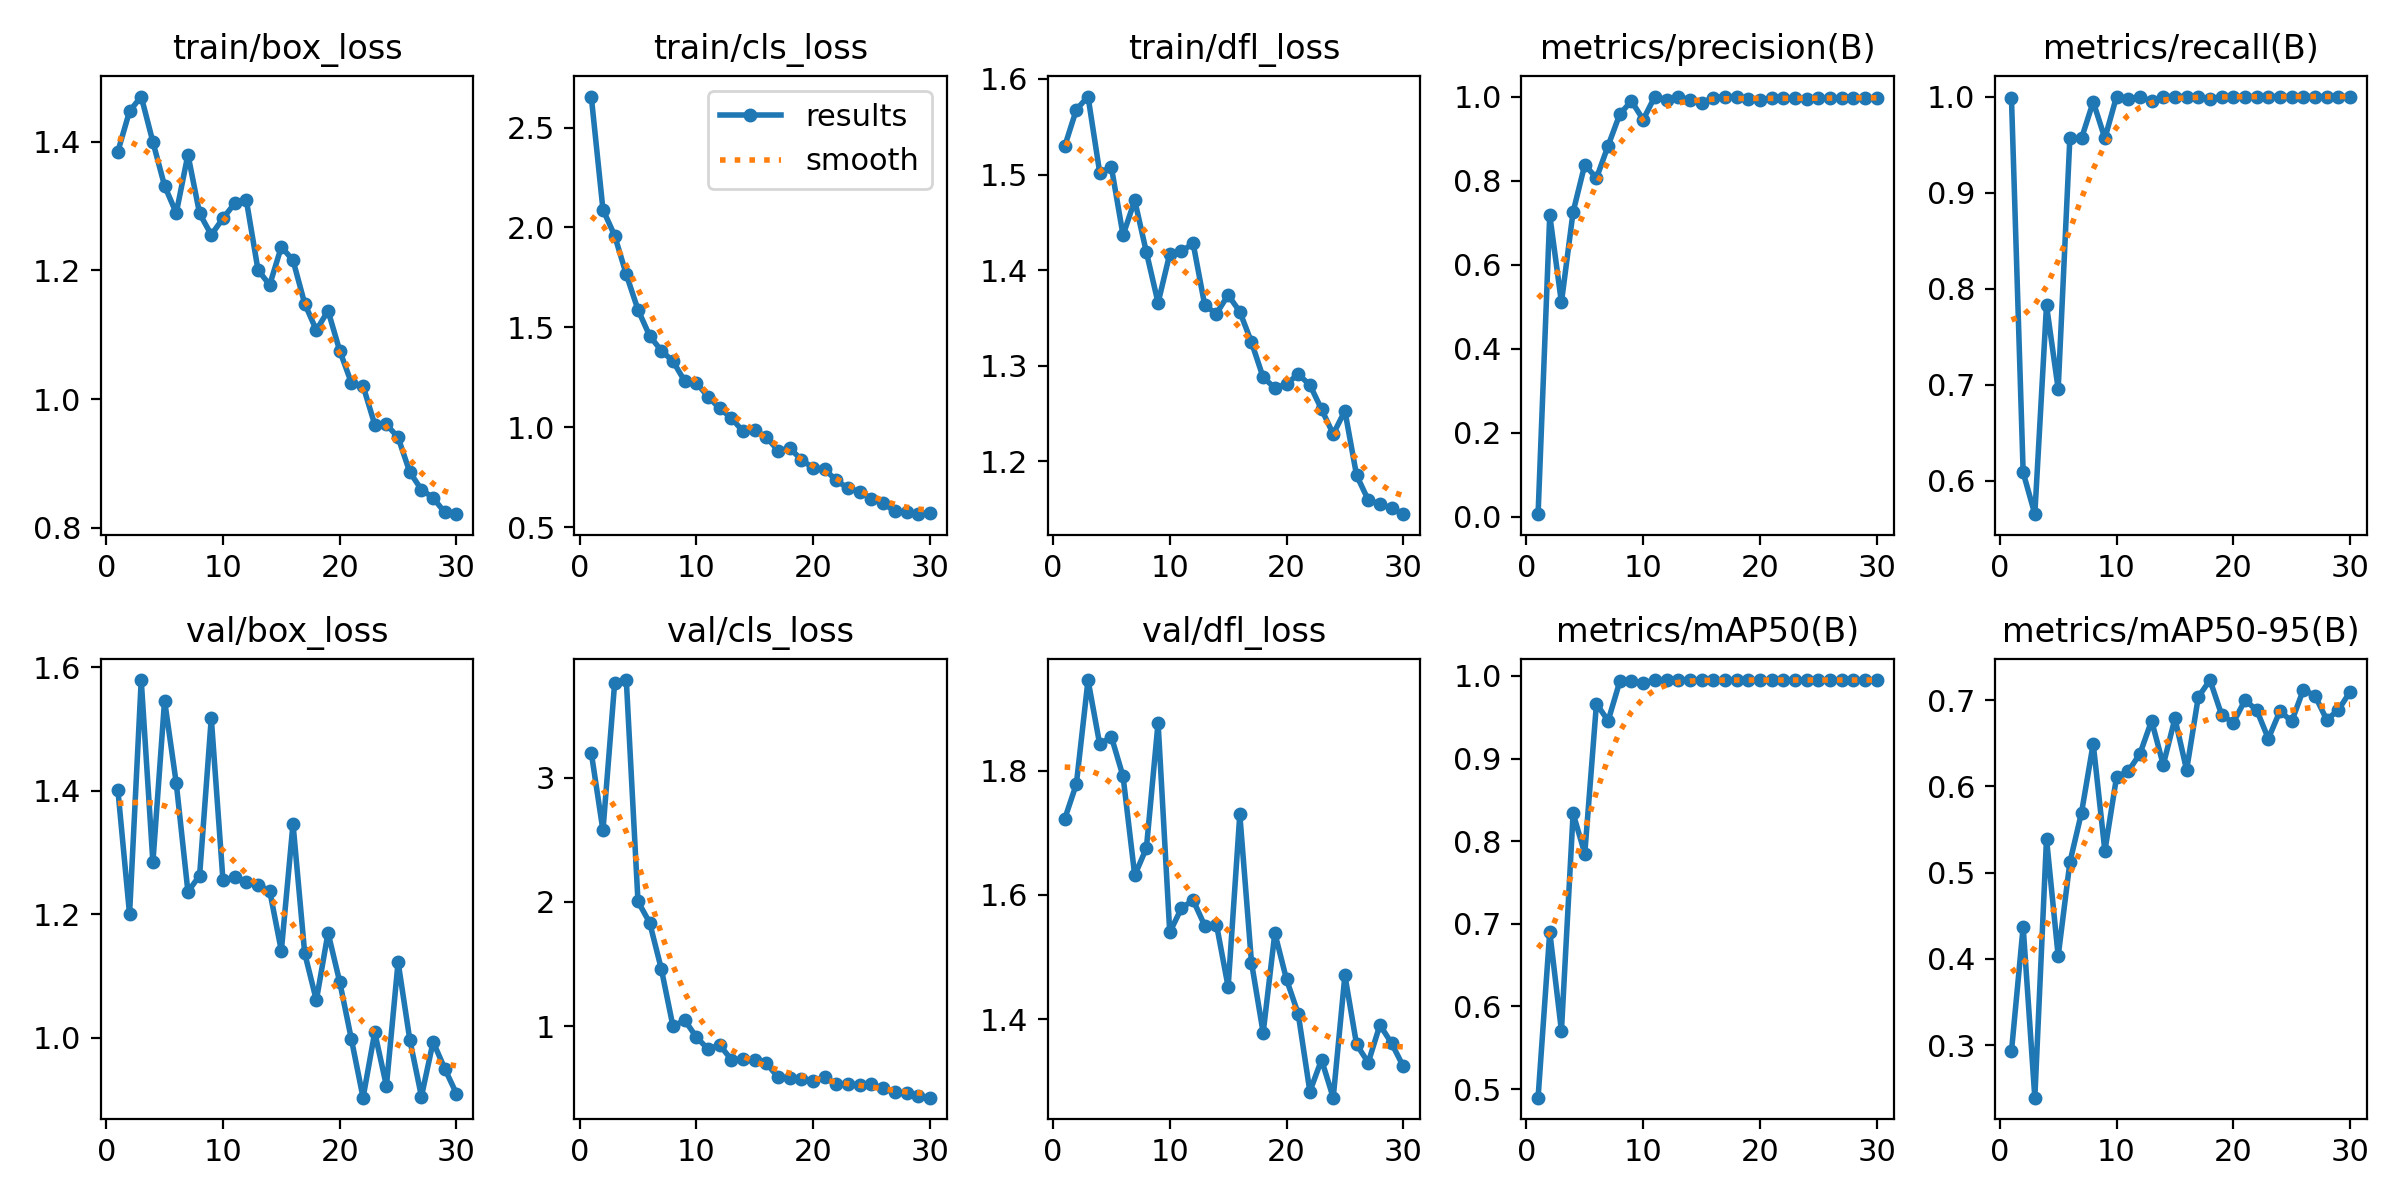

In [32]:
from IPython.display import Image as IPImage
IPImage(filename='/content/runs/detect/train/results.png')  # Loss ve metrik grafiği


# **SONUÇLARI PDF OLARAK KAYDEDİYORUZ**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image as PILImage
import os

# Dosya yolları
results_csv_path = "/content/runs/detect/train/results.csv"
results_png_path = "/content/runs/detect/train/results.png"
pdf_path = "/content/yolov8_results_summary.pdf"

# PDF oluşturuyoruz
with PdfPages(pdf_path) as pdf:
    # 1. results.png görselini PDF'e ekliyoruz
    if os.path.exists(results_png_path):
        img = PILImage.open(results_png_path).convert("RGB")
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.imshow(img)
        ax.axis('off')
        pdf.savefig(fig)
        plt.close()

    # 2. results.csv tablosunun son 10 epoch'unu ekliyoruz
    if os.path.exists(results_csv_path):
        df = pd.read_csv(results_csv_path)
        fig, ax = plt.subplots(figsize=(12, 4))
        ax.axis('off')
        table = ax.table(cellText=df.tail(10).values,
                         colLabels=df.columns,
                         loc='center',
                         cellLoc='center')
        table.scale(1, 1.5)
        pdf.savefig(fig)
        plt.close()

print(f"✅ PDF oluşturuldu: {pdf_path}")


✅ PDF oluşturuldu: /content/yolov8_results_summary.pdf


# **EK UYGULAMA: KAMERA ÜZERİNDEN CANLI FOTOĞRAF ÇEKİP TAHMİN YAPTIRMA**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image as IPImage
import cv2
import PIL.Image
import io
import numpy as np
import base64
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 1. Webcam'den canlı fotoğraf çekme fonksiyonu
def capture_image():
    js = Javascript('''
    async function takePhoto() {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📷 Fotoğraf Çek';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg');
    }
    takePhoto();
    ''')
    display(js)
    data = eval_js("takePhoto()")
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
    img = PIL.Image.open(binary)
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# 2. Fotoğrafı çek, kaydet ve modeli yükle
image = capture_image()
image_path = '/content/live_capture.jpg'
cv2.imwrite(image_path, image)

# 3. YOLOv8 modelini yükle
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Eğittiğin modelin yolu

# 4. Tahmin yap ve bounding box'lı görseli al
results = model.predict(source=image_path, conf=0.5)
annotated_img = results[0].plot()

# 5. Görseli göster
plt.imshow(annotated_img)
plt.axis('off')
plt.title("Tahmin Sonucu (Bounding Box)")
plt.show()
